In [18]:
import backbones
import cv2
import numpy as np
from PIL import Image,ImageDraw
import os
import matplotlib.pyplot as plt

In [16]:

def recflection_remove(img):
    ret, mask = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY) # 二值化
    kernel = np.ones((5, 5), np.uint8)                          # 构建算子
    dilation = cv2.dilate(mask, kernel, iterations=1)           # 构建蒙版
    dst = cv2.inpaint(img, dilation, 5, cv2.INPAINT_TELEA)      # FMM算法修复光点
    return dst


def processing(image_path,r):                                  # 虹膜内外圆定位
    image = cv2.imread(image_path)
    image = cv2.resize(image, (640, 480), interpolation=cv2.INTER_LINEAR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(image, 11)
    ret, _ = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 50, param1=ret, param2=30, minRadius=20,
                               maxRadius=100)
    circles = circles[0, :, :]  # 提取为二维
    circles = np.int16(np.around(circles))  # 四舍五入，取整
    for i in circles[:]:
        image = image[i[1] - i[2] - r:i[1] + i[2] + r, i[0] - i[2] -r:i[0] + i[2] + r]
        radus = i[2]
    return image, radus


def daugman_normalizaiton(image, height, width, r_in, r_out):       # Daugman归一化，输入为640*480,输出为width*height
    thetas = np.arange(0, 2 * np.pi, 2 * np.pi / width)  # Theta values
    r_out = r_in + r_out
    # Create empty flatten image
    flat = np.zeros((height,width, 3), np.uint8)
    circle_x = int(image.shape[0] / 2)
    circle_y = int(image.shape[1] / 2)

    for i in range(width):
        for j in range(height):
            theta = thetas[i]  # value of theta coordinate
            r_pro = j / height  # value of r coordinate(normalized)

            # get coordinate of boundaries
            Xi = circle_x + r_in * np.cos(theta)
            Yi = circle_y + r_in * np.sin(theta)
            Xo = circle_x + r_out * np.cos(theta)
            Yo = circle_y + r_out * np.sin(theta)

            # the matched cartesian coordinates for the polar coordinates
            Xc = (1 - r_pro) * Xi + r_pro * Xo
            Yc = (1 - r_pro) * Yi + r_pro * Yo

            color = image[int(Xc)][int(Yc)]  # color of the pixel

            flat[j][i] = color
    return flat  # liang

In [61]:

iris = np.array(Image.open(os.path.join('../../Datasets/train_iris_nd_crosssensor_2013/', '2010_028_001_L_1_1L-lg2200.tiff', 'iris_right.UNKNOWN')))


[358 260 126]
[346 276  36]
[408 280  75]
153.0


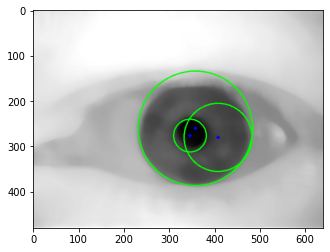

In [1]:
import math

In [3]:
b = 5e-5
q_p = 1.6e-19
g = 9.81
theta = math.pi/2
m = 1.673e-27

In [8]:
v = (m*g)/(math.sin(theta)*q_p*b)
f"{v:.3e}"

'2.052e-03'